In [ ]:
"""
================================
Nearest Neighbors Classification
================================

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# import the iris data to play with, keep only two input variables in order to make the plots at the end of the script
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target


Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.



In [ ]:
X.shape

(150, 2)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors) # je précise la méthode et ses hyperparamètres
clf.fit(X, y) # je lance l'apprentissage

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Si on est en régresssion..
#clf = neighbors.KNeighborsRegressor(n_neighbors=) # je précise la méthode et ses hyperparamètres


In [ ]:
# prevision
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1])

In [ ]:
clf.score(X,y) # predit + calcul le score = la précision

0.8466666666666667

In [ ]:
import random
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=random.seed())
print(X_train.shape)
print(X_test.shape)


(105, 2)
(45, 2)


In [ ]:
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors) # je précise la méthode et ses hyperparamètres
clf.fit(X_train, Y_train) # je lance l'apprentissage
prev_test = clf.predict(X_test)
sc_train = clf.score(X_train,Y_train)
sc_test = clf.score(X_test,Y_test)
print(sc_train)
print(sc_test)


0.8476190476190476
0.6888888888888889


In [ ]:
# Compute the confusion matrix between kmean label and iris types
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_test,prev_test)
# the confusion matrix is difficult to read as labels assigned by kmeans are arbitrary
print(cm)

[[15  0  0]
 [ 0 10 11]
 [ 0  3  6]]


In [ ]:
# Pour voir l'effet du partage ...

from sklearn.model_selection import KFold
kf=KFold(n_splits=4, shuffle=True) # partages de validation
XXX = X_train[:12,:]  # je prends uniquement les 12 premières lignes
#print(XXX)
for learn,test in kf.split(XXX): # boucle sur différents partages de validation
  print("Learn")
  print(learn)
  print("test")
  print(test)

Learn
[ 0  1  2  3  5  6  9 10 11]
test
[4 7 8]
Learn
[ 0  1  2  4  6  7  8  9 11]
test
[ 3  5 10]
Learn
[ 0  2  3  4  5  7  8  9 10]
test
[ 1  6 11]
Learn
[ 1  3  4  5  6  7  8 10 11]
test
[0 2 9]


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3, shuffle=True) # partages de validation


from sklearn import neighbors
scores=[]
for k in range(1,10):  # les différentes valeurs de k à tester
    score=0
    clf=neighbors.KNeighborsClassifier(k)
    for learn,test in kf.split(X_train): # boucle sur différents partages de validation
        X_app=X_train[learn]
        Y_app=Y_train[learn]
        clf.fit(X_app,Y_app)
        X_val=X_train[test]
        Y_val=Y_train[test]
        score+=clf.score(X_val,Y_val)
    scores.append(score)
print(scores)
#plt(scores)
k_opt=scores.index(max(scores)) + 1  # valeur optimale de k
print(k_opt)

[2.314285714285714, 2.1714285714285717, 2.4000000000000004, 2.2857142857142856, 2.571428571428571, 2.4571428571428573, 2.4285714285714284, 2.5428571428571427, 2.542857142857143]
5


In [ ]:
h = .02  # step size in the mesh for the graphics

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


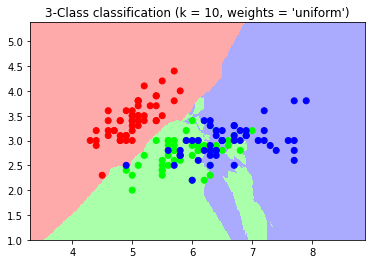

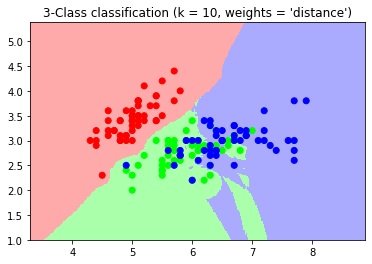

In [ ]:
# try two different values for the weights argument in knn

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()